<a href="https://colab.research.google.com/github/mrdbourke/zero-to-mastery-ml/blob/master/section-4-unstructured-data-projects/end-to-end-dog-vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# 0 Getting workspace ready.
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import os
# print("All imports are correct. Workspace is ready.")

In [76]:
# 0. Defining a function.

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  IMG_SIZE = 224
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image


def create_data_batches(image_paths):
  """
  Creates batches (size=32) of data.
  """
  print("Creating data batches...")
  data = tf.data.Dataset.from_tensor_slices((tf.constant(image_paths))) 
  data_batch = data.map(process_image).batch(32)  
  return data_batch

# def create_data_batches(x, y=None, BATCH_SIZE=32, valid_data=False, test_data=False):
#   """
#   Creates batches of data out of image (x) and label (y) pairs.
#   Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
#   Also accepts test data as input (no labels).
#   """
#   # If the data is a test dataset, we probably don't have labels
#   if test_data:
#     print("Creating test data batches...")
#     data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
#     data_batch = data.map(process_image).batch(BATCH_SIZE)
#     return data_batch
  
#   # If the data if a valid dataset, we don't need to shuffle it
#   elif valid_data:
#     print("Creating validation data batches...")
#     data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
#                                                tf.constant(y))) # labels
#     data_batch = data.map(get_image_label).batch(BATCH_SIZE)
#     return data_batch

#   else:
#     # If the data is a training dataset, we shuffle it
#     print("Creating training data batches...")
#     # Turn filepaths and labels into Tensors
#     data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
#                                               tf.constant(y))) # labels
    
#     # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
#     data = data.shuffle(buffer_size=len(x))

#     # Create (image, label) tuples (this also turns the image path into a preprocessed image)
#     data = data.map(get_image_label)

#     # Turn the data into batches
#     data_batch = data.batch(BATCH_SIZE)
#   return data_batch

In [77]:
def dogs_recognition():
  # 1. Load the Model.
  model_path = '/content/drive/MyDrive/Dogs_recognition/Dogs_recognition_Model.h5'
  print("Model is loading...")
  model_dogs_recognition = tf.keras.models.load_model(model_path,  custom_objects={"KerasLayer":hub.KerasLayer})
  print("Correct model load - Dogs_recognition_Model.")
  # 2. Prepare image and turn into batches - by using functions.
  path = "/content/drive/MyDrive/Dogs_recognition/Dogs/"
  image_paths = [path + fname for fname in os.listdir(path)]
  new_data = create_data_batches(image_paths)  
  # 3. Making predictions and prepare visualization
  predictions = model_dogs_recognition.predict(new_data)
  print("Making predictions...")
  # 4. Prepare labels for predictions
  labels_csv = pd.read_csv("drive/MyDrive/Dogs_recognition/labels.csv")
  labels = labels_csv["breed"].to_numpy() 
  unique_dogs_breeds = np.unique(labels)
  predictions_labels = [unique_dogs_breeds[np.argmax(predictions[i])] for i in range(len(predictions))]
  # 5. Prepare image (unbatch)
  new_image = []
  for image in new_data.unbatch().as_numpy_iterator():
    new_image.append(image)
  # 6. Check image predictions and visualization
  plt.figure(figsize=(15, 15))
  for i, image in enumerate(new_image):
    plt.subplot(1,len(predictions_labels), i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(predictions_labels[i])
    plt.imshow(image)

Model is loading...
Correct model load - Dogs_recognition_Model.
Creating data batches...
Making predictions...


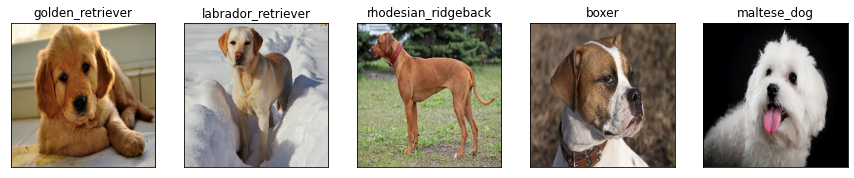

In [78]:
dogs_recognition()